In [1]:
import gurobipy as gp
from gurobipy import GRB

In [2]:
m = gp.Model()

# x[i,j] = 1 if block cell (i,j)
x = m.addVars( 5, 5, vtype=GRB.BINARY)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16


In [3]:
# minimize number of blocked cells
m.setObjective( gp.quicksum(x), GRB.MINIMIZE )

C:\Users\buchanan\AppData\Local\Temp\ipykernel_12852\2644876674.py:2: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  m.setObjective( gp.quicksum(x), GRB.MINIMIZE )


In [4]:
# block something from each column
m.addConstrs( gp.quicksum( x[i,j] for i in range(5) ) >= 1 for j in range(5) )

# block something from each row
m.addConstrs( gp.quicksum( x[i,j] for j in range(5) ) >= 1 for i in range(5) )

# block something from each diagonal
m.addConstr( gp.quicksum( x[j,j] for j in range(5) ) >= 1 )
m.addConstr( gp.quicksum( x[j,4-j] for j in range(5) ) >= 1 )

# cannot block free space
x[2,2].UB = 0

In [5]:
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900K, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 12 rows, 25 columns and 60 nonzeros
Model fingerprint: 0x39328e48
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 9.0000000
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 12 rows, 24 columns, 56 nonzeros
Variable types: 0 continuous, 24 integer (24 binary)

Root relaxation: objective 5.000000e+00, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0 

In [6]:
import numpy as np
a = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        a[i,j] = round( 1 - x[i,j].x )

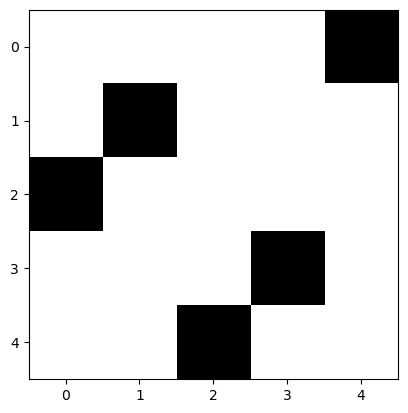

In [7]:
import matplotlib.pyplot as plt
plt.ion()
plt.imshow(a, cmap='gray', interpolation='none')